<center><h1> Série de Travaux Pratiques N° 7 - Machine Learning </h1></center>
<center><h2> K-Nearest Neighbor and Decision Tree</h2></center>

---



Pour ce TP, on utilisera le **dataset IRIS**. Ce dernier est une base de données regroupant les caractéristiques de **trois espèces de fleurs d’Iris, à savoir Setosa, Versicolour et Virginica**. Chaque ligne de ce jeu de données est une observation des caractéristiques d’une fleur d’Iris. Ce dataset décrit les espèces d’Iris par quatre propriétés : longueur et largeur de sépales ainsi que longueur et largeur de pétales. La base de données comporte 150 observations (50 observations par espèce).

# **Partie I : K-Nearest Neighbor**

# **Questions :**

1- Importer les packages nécessaires

2- Lire l'ensemble de données dans le dataframe pandas

3- Afficher et explorer l'ensemble de données "**iris.csv**"

4- Extraire les variables d'entrée X

5- Extraire les variables de sortie y

6- Diviser le dataset en Train / Test

7- Mise à l'échelle des fonctionnalités avec Transform()

8- Définir votre modèle **KNN**

9- Entraîner le modèle

10- Prédiction sur l'ensemble de test

11- Évaluation du modèle à l'aide de métriques

In [1]:
# IRIS Dataset : KNN


# 1- Importer les packages nécessaires

# 2- Lire l'ensemble de données dans le dataframe pandas

# 3- Afficher et explorer l'ensemble de données "**iris.csv**"

# 4- Extraire les variables d'entrée X

# 5- Extraire les variables de sortie y

# 6- Diviser le dataset en Train / Test

# 7- Mise à l'échelle des fonctionnalités avec Transform()

# 8- Définir votre modèle KNN

# 9- Entraîner le modèle

# 10- Prédiction sur l'ensemble de test

# 11- Évaluation du modèle à l'aide de métriques

#12- Changer le K = {5, 10, 20, 30, 40}, que remarquez-vous?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:

data = pd.read_csv('iris.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:

data.info

<bound method DataFrame.info of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>

In [5]:

X = data.drop('variety', axis=1) 
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:

y = data['variety']
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Appliquer le LabelEncoder à la variable dépendante
y = label_encoder.fit_transform(y)

y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
       [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
       [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
       [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
       [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
       [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
       [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
       [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
       [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
       [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
       [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
       [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
       [ 0.59831066, -0.

In [10]:

from sklearn.neighbors import  KNeighborsClassifier

Classifier =KNeighborsClassifier(n_neighbors=3)
np.int = int
Classifier.fit(X_train,y_train)

C:\Users\sasuk\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\sasuk\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
y_pred=Classifier.predict(X_test)


C:\Users\sasuk\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\sasuk\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


In [12]:
from sklearn.metrics import  classification_report,confusion_matrix,accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print("Exactitude du modèle :", accuracy)


matrix=confusion_matrix(y_test,y_pred)
print("matrix de confusion:",matrix)

print(classification_report(y_test, y_pred))


Exactitude du modèle : 100.0
matrix de confusion: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



*******************************
K=5: Accuracy=1.0
*******************************
K=10: Accuracy=1.0
*******************************
K=20: Accuracy=1.0
*******************************
K=30: Accuracy=0.9666666666666667
*******************************
K=40: Accuracy=0.9666666666666667


C:\Users\sasuk\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\sasuk\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\sasuk\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\sasuk\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\sasuk\Anaconda3\lib\site-packages\sklearn\neighbors\bas

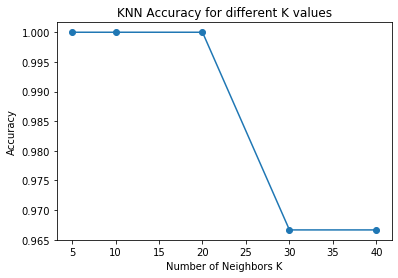

In [13]:
k_values = [5, 10, 20, 30, 40]
accuracies = []

for k in k_values:
    print("*******************************")
    knn = KNeighborsClassifier(n_neighbors=k)
    np.int = int
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"K={k}: Accuracy={accuracy}")

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different K values')
plt.show()

# **Partie II : Decision Trees**

# **Questions :**

1- Importer les packages nécessaires

2- Lire l'ensemble de données dans le dataframe pandas

3- Afficher et explorer l'ensemble de données "**iris.csv**"

4- Extraire les variables d'entrée X

5- Extraire les variables de sortie y

6- Diviser le dataset en Train / Test

7- Mise à l'échelle des fonctionnalités avec Transform()

8- Définir votre modèle **Decision Tree**

9- Entraîner le modèle

10- Prédiction sur l'ensemble de test

11- Évaluation du modèle à l'aide de métriques

In [14]:
# IRIS Dataset : Decision Tree

# 1- Importer les packages nécessaires

# 2- Lire l'ensemble de données dans le dataframe pandas

# 3- Afficher et explorer l'ensemble de données "iris.csv"

# 4- Extraire les variables d'entrée X 

# 5- Extraire les variables de sortie y

# 6- Diviser le dataset en Train / Test

# 7- Mise à l'échelle des fonctionnalités avec Transform()
                                                
# 8- Définir votre modèle DT

# 9- Entraîner le modèle

# 10- Prédiction sur l'ensemble de test

# 11- Évaluation du modèle à l'aide de métriques


In [15]:
# 1- Importer les packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [16]:
# 2- Lire l'ensemble de données dans le dataframe pandas
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [17]:
# 3- Afficher et explorer l'ensemble de données "iris.csv"
df.info

<bound method DataFrame.info of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>

In [18]:
# 4- Extraire les variables d'entrée X
X = df.drop('variety', axis=1) 
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
# 5- Extraire les variables de sortie y
y = df['variety']
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [20]:
# 6- Diviser le dataset en Train / Test
from sklearn.model_selection import train_test_split

In [21]:
# 7- Mise à l'échelle des fonctionnalités avec Transform()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Appliquer le LabelEncoder à la variable dépendante
y = label_encoder.fit_transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
# 8- Définir votre modèle DT
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

In [23]:
# 9- Entraîner le modèle
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [26]:
# 10- Prédiction sur l'ensemble de test
y_pred=Classifier.predict(X_test)
y_pred

C:\Users\sasuk\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\sasuk\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa'], dtype=object)

In [25]:
# 11- Évaluation du modèle à l'aide de métriques
from sklearn.metrics import  classification_report,confusion_matrix,accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print("Exactitude du modèle :", accuracy)


matrix=confusion_matrix(y_test,y_pred)
print("matrix de confusion:",matrix)

print(classification_report(y_test, y_pred))

Exactitude du modèle : 100.0
matrix de confusion: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

